This code is used for visualisation of the database scans.

In [1]:
import numpy as np
import nrrd
import matplotlib.pyplot as plt

In [2]:
def downsample(data, factor):
    z, y, x = data.shape
    new_z, new_y, new_x = z // factor, y // factor, x // factor

    downsampled_data = data[:new_z*factor, :new_y*factor, :new_x*factor].reshape(new_z, factor, new_y, factor, new_x, factor).sum(axis=(1, 3, 5)) > (factor**3 / 2)

    return downsampled_data.astype(int)


def downsample_zy(data, factor):
    z, y, x = data.shape
    new_z, new_y = z // factor, y // factor

    # Downsample only z and y axes
    downsampled_data = data[:new_z*factor, :new_y*factor, :].reshape(new_z, factor, new_y, factor, x).sum(axis=(1, 3)) > (factor**2 / 2)

    return downsampled_data.astype(int)


def downsample_x(data, factor):
    z, y, x = data.shape
    new_x = x // factor

    # Downsample only the x axis
    downsampled_data = data[:, :, :new_x*factor].reshape(z, y, new_x, factor).sum(axis=3) > (factor / 2)

    return downsampled_data.astype(int)


def plot_segmentation(data, angles=[(30, 0), (30, 45), (30, 90)], 
                      transparency=0.6, title='Data', figsize=(12, 4)):


    x, y, z = np.indices((data.shape[0]+1, data.shape[1]+1, data.shape[2]+1))

    mask = data == 1

    fig = plt.figure(figsize=figsize)

    for i, angle in enumerate(angles):
        ax = fig.add_subplot(1, 3, i+1, projection='3d')
        
        # Plot the voxels with '0' as transparent
        ax.voxels(x, y, z, mask, facecolors='blue', alpha=transparency)

        ax.view_init(elev=angle[0], azim=angle[1])
        ax.set_title(f'elev={angle[0]}, azim={angle[1]}')

    plt.suptitle(title)



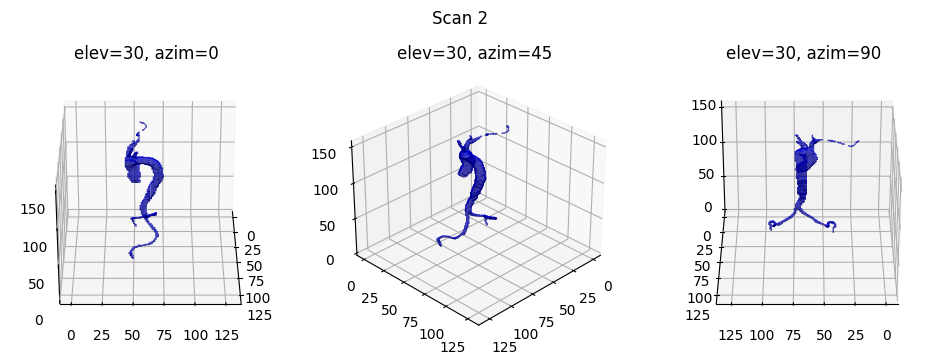

In [3]:
scans_to_plot = 2

for scan in scans_to_plot:
    file_path_seg = f'KiTS\K{scan}\K{scan}.seg.nrrd'
    data_seg, header_seg = nrrd.read(file_path_seg)

    data_seg = downsample(data_seg, 4)
    plot_segmentation(data_seg, title=f'Scan {scan}')
    plt.show()

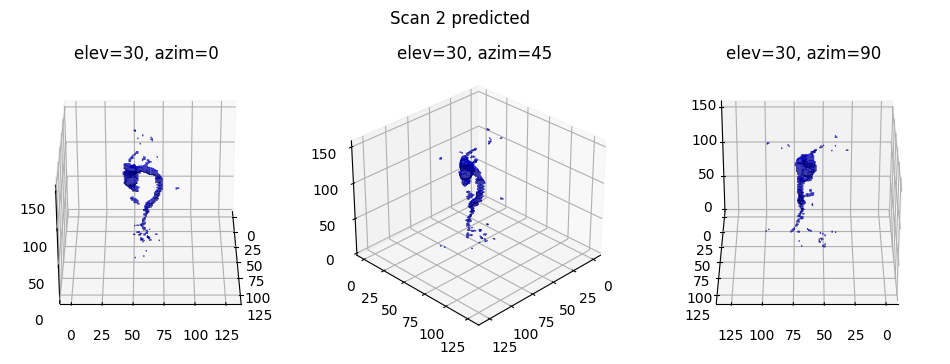

In [17]:
data = np.load("3D_scan2_small_unet_model_prediction.npy")
data = downsample_x(data, 4)

plot_segmentation(data, title=f'Scan {2} predicted')

plt.show()